PH Workbook:

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import xlrd

Import the nummerical data from the Excel workbook

In [41]:
xls = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')
xls.sheet_names

['Introduction',
 'Outcomes & Factors Rankings',
 'Outcomes & Factors SubRankings',
 'Ranked Measure Data',
 'Ranked Measure Sources & Years',
 'Additional Measure Data',
 'Addtl Measure Sources & Years']

In [42]:
df1 = pd.read_excel(xls, 'Outcomes & Factors Rankings', header=1)
df2 = pd.read_excel(xls, 'Outcomes & Factors SubRankings', header=1)
df3 = pd.read_excel(xls, 'Ranked Measure Data', header=1)
df4 = pd.read_excel(xls, 'Additional Measure Data', header=1)

Import the reference data from the Excel workbook

In [43]:
xls = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')
rf1 = pd.read_excel(xls, 'Ranked Measure Sources & Years', header = 1)
rf2 = pd.read_excel(xls, 'Addtl Measure Sources & Years', header = 1)

In [44]:
df1.head(1)

,FIPS,State,County,# of Ranked Counties,Rank,Quartile,Rank.1,Quartile.1
0,1001,Alabama,Autauga,67,7,1,11,1


In [45]:
df2.head(1)

,FIPS,State,County,# of Ranked Counties,Rank,Quartile,Rank.1,Quartile.1,Rank.2,Quartile.2,Rank.3,Quartile.3,Rank.4,Quartile.4,Rank.5,Quartile.5
0,1001,Alabama,Autauga,67,8,1,5,1,15,1,14,1,5,1,50,3


In [46]:
df3.head(1)

,FIPS,State,County,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (Black),YPLL Rate (Hispanic),YPLL Rate (White),...,95% CI - High.17,Quartile.33,% Drive Alone (Black),% Drive Alone (Hispanic),% Drive Alone (White),# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.18,95% CI - High.18,Quartile.34
0,1001,Alabama,Autauga,8824.057123,7935.325829,9712.788417,1,10471.252986,NaN,8706.658832,...,88.900847,3,82.722037,NaN,83.710021,20911,38.3,34.362673,42.237327,3


In [47]:
df4.head(1)

,FIPS,State,County,Life Expectancy,95% CI - Low,95% CI - High,Life Expectancy (Black),Life Expectancy (Hispanic),Life Expectancy (White),# Deaths,...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low.16,95% CI - High.16,% Female,# Rural,% Rural
0,1001.0,Alabama,Autauga,76.330589,75.554117,77.107061,74.600628,NaN,76.337219,815.0,...,2.857452,41336,74.473912,430.0,0.828548,0.422472,1.234624,51.342246,22921.0,42.002162


In [48]:
xls = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')
sheets = xls.sheet_names
sheets

['Introduction',
 'Outcomes & Factors Rankings',
 'Outcomes & Factors SubRankings',
 'Ranked Measure Data',
 'Ranked Measure Sources & Years',
 'Additional Measure Data',
 'Addtl Measure Sources & Years']

In [49]:
def missingvalues(sheet_name):
    """
    Outputs missing values percentage and a heatmap for a an Excel spreadsheet sheet
    input: sheet_name (use the .sheet_name option on a ExcelFile object to get the list)
    """
    df = xls.parse(sheet_name,header=[0,1])
    cols = df.columns
    ax = sns.heatmap(df[cols].isnull(), cmap=sns.color_palette('Set2',2))
    ax.set_title(f'Missing values for {sheet_name}')
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print(f'{col} - {round(pct_missing*100)}% missing')

('Unnamed: 0_level_0', 'FIPS') - 0.0% missing
('Unnamed: 1_level_0', 'State') - 0.0% missing
('Unnamed: 2_level_0', 'County') - 0.0% missing
('Premature death', 'Years of Potential Life Lost Rate') - 7.0% missing
('Premature death', '95% CI - Low') - 7.0% missing
('Premature death', '95% CI - High') - 7.0% missing
('Premature death', 'Quartile') - 0.0% missing
('Premature death', 'YPLL Rate (Black)') - 57.0% missing
('Premature death', 'YPLL Rate (Hispanic)') - 73.0% missing
('Premature death', 'YPLL Rate (White)') - 50.0% missing
('Poor or fair health', '% Fair/Poor') - 0.0% missing
('Poor or fair health', '95% CI - Low') - 0.0% missing
('Poor or fair health', '95% CI - High') - 0.0% missing
('Poor or fair health', 'Quartile') - 0.0% missing
('Poor physical health days', 'Physically Unhealthy Days') - 0.0% missing
('Poor physical health days', '95% CI - Low') - 0.0% missing
('Poor physical health days', '95% CI - High') - 0.0% missing
('Poor physical health days', 'Quartile') - 0.0% m

('Severe housing problems', '95% CI - High') - 0.0% missing
('Severe housing problems', 'Severe Housing Cost Burden') - 0.0% missing
('Severe housing problems', 'Overcrowding') - 0.0% missing
('Severe housing problems', 'Inadequate Facilities') - 0.0% missing
('Severe housing problems', 'Quartile') - 0.0% missing
('Driving alone to work', '% Drive Alone') - 0.0% missing
('Driving alone to work', '95% CI - Low') - 0.0% missing
('Driving alone to work', '95% CI - High') - 0.0% missing
('Driving alone to work', 'Quartile') - 0.0% missing
('Driving alone to work', '% Drive Alone (Black)') - 63.0% missing
('Driving alone to work', '% Drive Alone (Hispanic)') - 59.0% missing
('Driving alone to work', '% Drive Alone (White)') - 47.0% missing
('Long commute - driving alone', '# Workers who Drive Alone') - 0.0% missing
('Long commute - driving alone', '% Long Commute - Drives Alone') - 0.0% missing
('Long commute - driving alone', '95% CI - Low') - 0.0% missing
('Long commute - driving alone', 

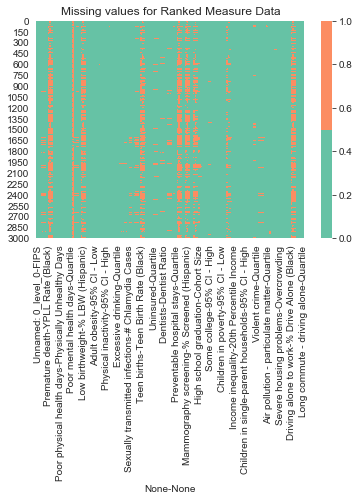

In [50]:
missingvalues(sheets[3])

In [51]:
pd.set_option('display.max_columns', None)  

#### Join the 4 dataframes from the 4 sheets 

In [52]:
print(f'df1 shape is: ' + str(df1.shape))
#print(f'df2 shape is: ' + str(df2.shape))
print(f'df3 shape is: ' + str(df3.shape))
print(f'df4 shape is: ' + str(df4.shape))
expected_cols = int(df1.shape[1]+df3.shape[1]+df4.shape[1]-3)

print(f'Expected merged df columns is :', + expected_cols)

df1 shape is: (3142, 8)
df3 shape is: (3142, 162)
df4 shape is: (3144, 111)
Expected merged df columns is : 278


In [53]:
droplist = ['County', 'State']
df2.drop(droplist,axis=1,inplace=True)
df3.drop(droplist,axis=1,inplace=True)
df4.drop(droplist,axis=1,inplace=True)

df = df1.merge(df3, on='FIPS')
df = df.merge(df4, on='FIPS')
df.shape

(3142, 275)

In [54]:
cols = df.columns

In [55]:
droplist = [i for i in df.columns if i.startswith('Quartile')]
df.drop(droplist,axis=1,inplace=True)

droplist = [i for i in df.columns if i.startswith('95%')]
df.drop(droplist,axis=1,inplace=True)

droplist = [i for i in df.columns if i.startswith('CI')]
df.drop(droplist,axis=1,inplace=True)

droplist = [i for i in df.columns if i.startswith('Rank')]
df.drop(droplist,axis=1,inplace=True)


In [56]:
cols = df.columns.values

In [57]:
len(cols)

164

In [58]:
droplist = [i for i in df.columns if i.startswith('# ')]
droplist = [i for i in df.columns if i.startswith('# ')]
df.drop(droplist,axis=1,inplace=True)

In [59]:
droplist = [i for i in df.columns if i.startswith('95%')]
df.drop(droplist,axis=1,inplace=True)
cols = df.columns.values
print(len(cols))

128


In [60]:
droplist = [i for i in df.columns if i.endswith('.1')]
df.drop(droplist,axis=1,inplace=True)
droplist = [i for i in df.columns if i.endswith('.2')]
df.drop(droplist,axis=1,inplace=True)
droplist = [i for i in df.columns if i.endswith('.3')]
df.drop(droplist,axis=1,inplace=True)
droplist = [i for i in df.columns if i.endswith('_y')]
df.drop(droplist,axis=1,inplace=True)
droplist = [i for i in df.columns if i.endswith('(Black)')]
df.drop(droplist,axis=1,inplace=True)
droplist = [i for i in df.columns if i.endswith('(White)')]
df.drop(droplist,axis=1,inplace=True)
droplist = [i for i in df.columns if i.endswith('(Hispanic)')]
df.drop(droplist,axis=1,inplace=True)

cols = df.columns.values
print(len(cols))

86


In [61]:
cols

array(['FIPS', 'State', 'County', 'Years of Potential Life Lost Rate',
       '% Fair/Poor', 'Physically Unhealthy Days',
       'Mentally Unhealthy Days', 'Unreliable', '% LBW', '% Smokers',
       '% Obese', 'Food Environment Index', '% Physically Inactive',
       '% With Access', '% Excessive Drinking', '% Alcohol-Impaired',
       'Chlamydia Rate', 'Teen Birth Rate', '% Uninsured_x', 'PCP Rate',
       'PCP Ratio', 'Dentist Rate', 'Dentist Ratio', 'MHP Rate',
       'MHP Ratio', 'Preventable Hosp. Rate', '% Screened',
       '% Vaccinated', 'Cohort Size', 'Graduation Rate', 'Population_x',
       '% Some College', 'Labor Force', '% Unemployed',
       '% Children in Poverty', '80th Percentile Income',
       '20th Percentile Income', 'Income Ratio',
       '% Single-Parent Households', 'Association Rate',
       'Annual Average Violent Crimes', 'Violent Crime Rate',
       'Injury Death Rate', 'Average Daily PM2.5',
       'Presence of violation', '% Severe Housing Problems',
    

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 86 columns):
FIPS                                        3142 non-null int64
State                                       3142 non-null object
County                                      3142 non-null object
Years of Potential Life Lost Rate           2908 non-null float64
% Fair/Poor                                 3142 non-null float64
Physically Unhealthy Days                   3142 non-null float64
Mentally Unhealthy Days                     3142 non-null float64
Unreliable                                  170 non-null object
% LBW                                       3035 non-null float64
% Smokers                                   3142 non-null float64
% Obese                                     3142 non-null float64
Food Environment Index                      3123 non-null float64
% Physically Inactive                       3142 non-null float64
% With Access                            

In [63]:
unreliable = df[df['Unreliable']=='x']
unreliable.head()

,FIPS,State,County,Years of Potential Life Lost Rate,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,Unreliable,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,% Alcohol-Impaired,Chlamydia Rate,Teen Birth Rate,% Uninsured_x,PCP Rate,PCP Ratio,Dentist Rate,Dentist Ratio,MHP Rate,MHP Ratio,Preventable Hosp. Rate,% Screened,% Vaccinated,Cohort Size,Graduation Rate,Population_x,% Some College,Labor Force,% Unemployed,% Children in Poverty,80th Percentile Income,20th Percentile Income,Income Ratio,% Single-Parent Households,Association Rate,Annual Average Violent Crimes,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of violation,% Severe Housing Problems,Severe Housing Cost Burden,Overcrowding,Inadequate Facilities,% Drive Alone,% Long Commute - Drives Alone,Life Expectancy,Age-Adjusted Mortality,Child Mortality Rate,Infant Mortality Rate,% Frequent Physical Distress,% Frequent Mental Distress,% Diabetic,HIV Prevalence Rate,% Food Insecure,% Limited Access,Drug Overdose Mortality Rate,MV Mortality Rate,% Insufficient Sleep,Other PCP Rate,Other PCP Ratio,% Disconnected Youth,Household Income,% Free or Reduced Lunch,Segregation index,Segregation Index,Homicide Rate,Firearm Fatalities Rate,% Homeowners,% Severe Housing Cost Burden,% < 18,% 65 and over,% African American,% American Indian/Alaskan Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
68,2016,Alaska,Aleutians West,NaN,15.176383,2.966867,2.569844,x,7.589286,15.346801,40.0,7.7,23.9,89.552239,19.390485,100.0,315.7,15.220700,22.278978,35.41704,2824:1,104.11244,961:1,86.76037,1153:1,NaN,NaN,NaN,45.0,93.333333,1928,53.060166,3861.0,3.626004,7.6,144308,44879,3.215491,30.620985,7.083407,13.0,294.617564,NaN,NaN,No,18.421053,8.127208,9.649123,2.105263,45.378788,0.5,81.367308,245.0,NaN,NaN,8.954271,8.483086,8.2,NaN,12.4,8.574048,NaN,NaN,34.421050,190.87281,524:1,NaN,80290.0,18.644068,NaN,11.244810,NaN,NaN,30.131363,8.176101,11.712650,6.541732,6.472323,11.990283,40.829429,2.568107,13.569322,23.269131,7.764536,33.420094,100.000000
72,2068,Alaska,Denali,NaN,12.200584,3.232785,2.959423,x,6.707317,17.614422,27.0,6.2,15.2,67.962760,22.715164,40.0,208.4,NaN,14.529915,0.00000,1953:0,0.00000,2074:0,NaN,NaN,NaN,NaN,NaN,51.0,45.098039,598,73.913043,1130.0,9.380531,9.0,131688,40107,3.283417,10.862620,20.481311,NaN,NaN,NaN,NaN,No,26.470588,7.794118,8.676471,15.441176,35.045514,20.4,81.204038,NaN,NaN,NaN,9.604781,9.886663,6.8,NaN,13.7,22.933715,NaN,NaN,29.999092,144.64802,691:1,NaN,73220.0,1.374570,NaN,NaN,NaN,NaN,78.613569,6.172840,18.900675,10.028930,1.783992,5.207329,4.580521,0.048216,3.809065,80.568949,0.630063,44.165863,100.000000
82,2164,Alaska,Lake and Peninsula,NaN,23.973524,5.248306,4.574549,x,4.888889,32.081323,33.5,3.4,23.6,47.087676,20.055093,NaN,959.7,27.160494,27.997179,64.02049,1562:1,0.00000,1620:0,61.72840,1620:1,NaN,NaN,NaN,NaN,NaN,345,48.115942,723.0,11.894882,22.3,89000,21357,4.167252,51.648352,6.402049,NaN,NaN,199.401795,NaN,Yes,26.530612,5.714286,8.979592,15.306122,22.043011,0.0,NaN,641.8,NaN,NaN,16.732175,16.051985,7.9,NaN,18.6,43.516344,NaN,NaN,34.389531,185.18519,540:1,NaN,47644.0,68.767908,NaN,NaN,NaN,NaN,68.137255,5.785124,28.024691,10.493827,0.987654,62.037037,2.654321,0.308642,3.148148,22.222222,0.988468,48.086420,100.000000
88,2198,Alaska,Prince of Wales-Hyder,11628.029401,19.295736,4.449669,3.968685,x,3.558719,23.359239,35.4,6.4,24.1,NaN,20.170589,40.0,441.6,14.062500,24.269744,78.77738,1269:1,46.56216,2148:1,77.60360,1289:1,NaN,NaN,NaN,103.0,70.873786,1518,48.089592,2836.0,11.424542,24.0,104519,22574,4.630061,39.262187,14.179928,NaN,NaN,144.944569,NaN,No,18.281938,7.250221,5.726872,6.828194,50.711812,10.1,73.623962,464.6,NaN,NaN,13.495299,13.356936,10.1,NaN,16.5,14.764996,NaN,NaN,33.078349,155.20720,644:1,NaN,46488.0,65.890308,NaN,37.554227,NaN,NaN,73.002160,7.300275,23.156914,15.831135,0.496663,42.

In [64]:
df.rename(columns={'Unreliable':'Unreliable (Low Birth Weight)'}, inplace=True)

In [ ]:
df.to_csv("cleaned_data.csv", index=False)

In [65]:
df.isna().sum()

FIPS                                   0
State                                  0
County                                 0
Years of Potential Life Lost Rate    234
% Fair/Poor                            0
                                    ... 
% Hispanic                             0
% Non-Hispanic White                   0
% Not Proficient in English            0
% Female                               0
% Rural                                7
Length: 86, dtype: int64

In [67]:
df.shape

(3142, 86)

### Data Exploration

Firearms fatalities vs percentage Excessive Drinking

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid') 

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('cleaned_data.csv')
df.head()
df = df.dropna(axis=1,how='all')

In [5]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_'), ('<','under'), ('%','percent'), ('/', '_or_') 
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

In [6]:
del df['Years_of_Potential_Life_Lost_Rate']
df['percent_Rural'] = df['percent_Rural'].replace(np.nan, 0)

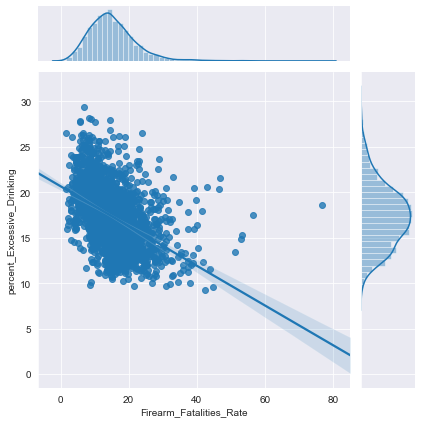

In [7]:
sns.jointplot('Firearm_Fatalities_Rate','percent_Excessive_Drinking', data=df, kind='reg');

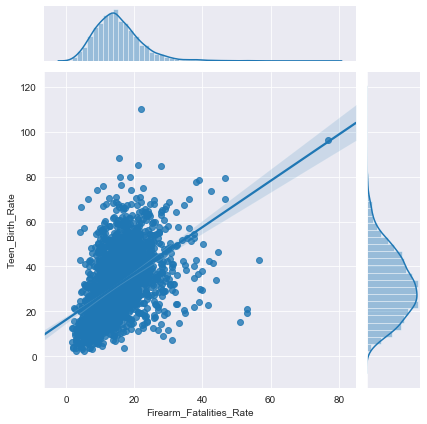

In [8]:
sns.jointplot('Firearm_Fatalities_Rate','Teen_Birth_Rate', data=df, kind='reg');

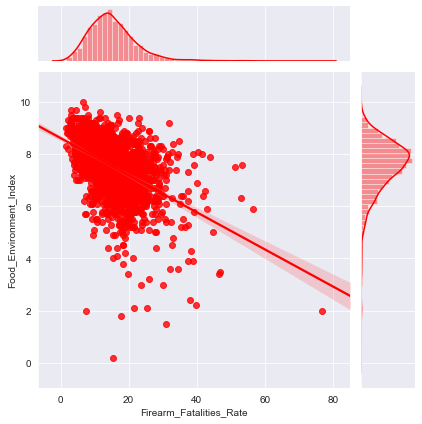

In [9]:
sns.jointplot('Firearm_Fatalities_Rate','Food_Environment_Index', data=df, kind='reg', color='red');

### Checking for Multicollinearity

In [10]:
feats = ['percent_Fair_or_Poor',
 'Physically_Unhealthy_Days',
 'Mentally_Unhealthy_Days',
 'percent_LBW',
 'percent_Smokers',
 'percent_Obese',
 'Food_Environment_Index',
 'percent_Physically_Inactive',
 'percent_With_Access',
 'percent_Excessive_Drinking',
 'percent_Alcohol_Impaired',
 'Chlamydia_Rate',
 'Teen_Birth_Rate',
 'percent_Uninsured_x']
corr = df[feats].corr()
corr

,percent_Fair_or_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,percent_LBW,percent_Smokers,percent_Obese,Food_Environment_Index,percent_Physically_Inactive,percent_With_Access,percent_Excessive_Drinking,percent_Alcohol_Impaired,Chlamydia_Rate,Teen_Birth_Rate,percent_Uninsured_x
percent_Fair_or_Poor,1.000000,0.880319,0.743129,0.588857,0.726768,0.440606,-0.563225,0.568656,-0.330797,-0.661190,-0.080774,0.410402,0.748308,0.450428
Physically_Unhealthy_Days,0.880319,1.000000,0.919823,0.491122,0.805291,0.413591,-0.497716,0.549584,-0.292543,-0.645317,-0.054927,0.288721,0.644770,0.272742
Mentally_Unhealthy_Days,0.743129,0.919823,1.000000,0.464118,0.739957,0.394903,-0.403154,0.517016,-0.215800,-0.620358,-0.072833,0.227793,0.500154,0.139731
percent_LBW,0.588857,0.491122,0.464118,1.000000,0.432811,0.270345,-0.469662,0.385296,-0.223622,-0.508487,-0.070907,0.421377,0.453987,0.230794
percent_Smokers,0.726768,0.805291,0.739957,0.432811,1.000000,0.567259,-0.450014,0.603679,-0.323870,-0.447061,0.003273,0.329079,0.584959,0.166236
percent_Obese,0.440606,0.413591,0.394903,0.270345,0.567259,1.000000,-0.264027,0.689915,-0.352901,-0.374700,0.005269,0.182100,0.400843,0.045834
Food_Environment_Index,-0.563225,-0.497716,-0.403154,-0.469662,-0.450014,-0.264027,1.000000,-0.314033,0.330378,0.434410,0.019675,-0.513012,-0.492910,-0.388876
percent_Physically_Inactive,0.568656,0.549584,0.517016,0.385296,0.603679,0.689915,-0.314033,1.000000,-0.453288,-0.562618,-0.077585,0.116258,0.538781,0.237903
percent_With_Access,-0.330797,-0.292543,-0.215800,-0.223622,-0.323870,-0.352901,0.330378,-0.453288,1.000000,0.351738,-0.004083,-0.014299,-0.352030,-0.284039
percent_Excessive_Drinking,-0.661190,-0.645317,-0.620358,-0.508487,-0.447061,-0.374700,0.434410,-0.562618,0.351738,1.000000,0.142020,-0.151407,-0.529697,-0.348376


### Heatmap

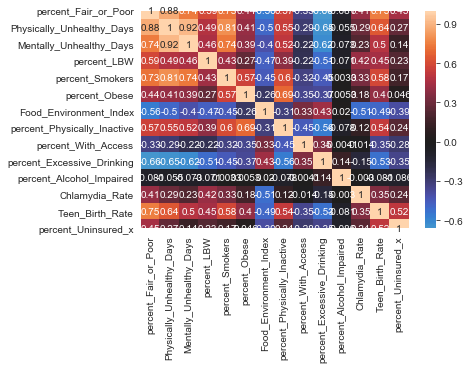

In [11]:
sns.heatmap(corr, center=0, annot=True);

### Modelling the Data

Import the necessary libraries for the modelling phase

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

##### Abitrary Selection of Explanatory Variables

Define the target variable and the independent and explanatory variables

In [13]:
outcome = 'Firearm_Fatalities_Rate'
x_cols = list(df.columns)
x_cols.remove(outcome)
x_cols.remove('FIPS')
x_cols.remove('State')
x_cols.remove('County')
x_cols.remove('20th_Percentile_Income')
x_cols.remove('80th_Percentile_Income')
x_cols.remove('Unreliable_(Low_Birth_Weight)')

x_cols = ['percent_Fair_or_Poor',
 'Physically_Unhealthy_Days',
 'Mentally_Unhealthy_Days',
 'percent_LBW',
 'percent_Smokers',
 'percent_Obese',
 'Food_Environment_Index',
 'percent_Physically_Inactive',
 'percent_With_Access',
 'percent_Excessive_Drinking',
 'percent_Alcohol_Impaired',
 'Chlamydia_Rate',
 'Teen_Birth_Rate',
 'percent_Uninsured_x']

In [14]:
df['percent_LBW'].fillna(0, inplace = True)
df['Food_Environment_Index'].fillna(df['Food_Environment_Index'].mean(), inplace = True)
df['percent_With_Access'].fillna(0, inplace = True)
df['percent_Alcohol_Impaired'].fillna(0, inplace = True)
df['percent_Uninsured_x'].fillna(0, inplace = True)
df['Chlamydia_Rate'].fillna(0, inplace = True)
df['Teen_Birth_Rate'].fillna(0, inplace = True)

### Test train split

In [16]:
train, test = train_test_split(df)
train.head(2)

,FIPS,State,County,percent_Fair_or_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,Unreliable_(Low_Birth_Weight),percent_LBW,percent_Smokers,percent_Obese,...,percent_65_and_over,percent_African_American,percent_American_Indian_or_Alaskan_Native,percent_Asian,percent_Native_Hawaiian_or_Other_Pacific_Islander,percent_Hispanic,percent_Non_Hispanic_White,percent_Not_Proficient_in_English,percent_Female,percent_Rural
449,13127,Georgia,Glynn,16.540050,3.767248,3.856052,NaN,11.929979,17.642098,28.7,...,19.441383,26.153233,0.478413,1.572430,0.200511,6.969818,63.421355,1.568117,52.748528,20.566147
3133,56029,Wyoming,Park,12.437748,3.351572,3.489174,NaN,7.510241,14.300251,23.6,...,22.243642,0.730519,0.906385,0.859037,0.060877,5.986201,90.540449,0.725579,50.118371,44.240383


In [17]:
print(len(train), len(test))
train.head(2)

2356 786


,FIPS,State,County,percent_Fair_or_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,Unreliable_(Low_Birth_Weight),percent_LBW,percent_Smokers,percent_Obese,...,percent_65_and_over,percent_African_American,percent_American_Indian_or_Alaskan_Native,percent_Asian,percent_Native_Hawaiian_or_Other_Pacific_Islander,percent_Hispanic,percent_Non_Hispanic_White,percent_Not_Proficient_in_English,percent_Female,percent_Rural
449,13127,Georgia,Glynn,16.540050,3.767248,3.856052,NaN,11.929979,17.642098,28.7,...,19.441383,26.153233,0.478413,1.572430,0.200511,6.969818,63.421355,1.568117,52.748528,20.566147
3133,56029,Wyoming,Park,12.437748,3.351572,3.489174,NaN,7.510241,14.300251,23.6,...,22.243642,0.730519,0.906385,0.859037,0.060877,5.986201,90.540449,0.725579,50.118371,44.240383


In [18]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Firearm_Fatalities_Rate   R-squared:                       0.377
Model:                                 OLS   Adj. R-squared:                  0.372
Method:                      Least Squares   F-statistic:                     71.13
Date:                     Mon, 24 Feb 2020   Prob (F-statistic):          1.05e-157
Time:                             11:07:54   Log-Likelihood:                -5162.1
No. Observations:                     1660   AIC:                         1.035e+04
Df Residuals:                         1645   BIC:                         1.044e+04
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      28.3477      3.557      7.970      0.000      21.371      35.324
percent_Fair_or_Poor           -0.7598      0.090     -8.407      0.000      -0.937      -0.583
Physically_Unhealthy_Days       2.7284      0.760      3.590      0.000       1.238       4.219
Mentally_Unhealthy_Days         0.1150      0.631      0.182      0.855      -1.122       1.352
percent_LBW                     0.5660      0.104      5.453      0.000       0.362       0.770
percent_Smokers                 0.1148      0.072      1.600      0.110      -0.026       0.255
percent_Obese                  -0.0949      0.045     -2.123      0.034      -0.183      -0.007
Food_Environment_Index         -1.3291      0.200     -6.646      0.000      -1.721      -0.937
percent_Physically_Inactive    -0.0341      0.046     -0.745      0.456      -0.124       0.056
percent_With_Access            -0.0525      0.008     -6.293      0.000      -0.069      -0.036
percent_Excessive_Drinking     -0.4184      0.067     -6.241      0.000      -0.550      -0.287
percent_Alcohol_Impaired        0.0356      0.012      2.865      0.004       0.011       0.060
Chlamydia_Rate                  0.0002      0.001      0.242      0.808      -0.001       0.002
Teen_Birth_Rate                 0.1181      0.015      7.699      0.000       0.088       0.148
percent_Uninsured_x             0.1869      0.039      4.740      0.000       0.110       0.264
==============================================================================
Omnibus:                      652.032   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3936.041
Skew:                           1.726   Prob(JB):                         0.00
Kurtosis:                       9.707   Cond. No.                     1.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Remove the Uninfluential Features

In [19]:
# Your code here - Remove features which do not appear to be statistically relevant
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

15 10
['percent_Fair_or_Poor', 'Physically_Unhealthy_Days', 'percent_LBW', 'percent_Obese', 'Food_Environment_Index']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,28.3477,3.557,7.970,0.000,21.371,35.324
percent_Fair_or_Poor,-0.7598,0.090,-8.407,0.000,-0.937,-0.583
Physically_Unhealthy_Days,2.7284,0.760,3.590,0.000,1.238,4.219
Mentally_Unhealthy_Days,0.1150,0.631,0.182,0.855,-1.122,1.352
percent_LBW,0.5660,0.104,5.453,0.000,0.362,0.770


In [20]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Firearm_Fatalities_Rate   R-squared:                       0.376
Model:                                 OLS   Adj. R-squared:                  0.372
Method:                      Least Squares   F-statistic:                     99.34
Date:                     Mon, 24 Feb 2020   Prob (F-statistic):          5.65e-161
Time:                             11:07:59   Log-Likelihood:                -5163.6
No. Observations:                     1660   AIC:                         1.035e+04
Df Residuals:                         1649   BIC:                         1.041e+04
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     27.9143      3.416      8.172      0.000      21.214      34.614
percent_Fair_or_Poor          -0.7669      0.086     -8.931      0.000      -0.935      -0.598
Physically_Unhealthy_Days      3.1794      0.470      6.771      0.000       2.258       4.100
percent_LBW                    0.5838      0.100      5.852      0.000       0.388       0.779
percent_Obese                 -0.0879      0.037     -2.349      0.019      -0.161      -0.014
Food_Environment_Index        -1.3872      0.181     -7.656      0.000      -1.743      -1.032
percent_With_Access           -0.0521      0.008     -6.584      0.000      -0.068      -0.037
percent_Excessive_Drinking    -0.3866      0.062     -6.254      0.000      -0.508      -0.265
percent_Alcohol_Impaired       0.0365      0.012      2.953      0.003       0.012       0.061
Teen_Birth_Rate                0.1196      0.015      8.082      0.000       0.091       0.149
percent_Uninsured_x            0.1782      0.039      4.598      0.000       0.102       0.254
==============================================================================
Omnibus:                      653.572   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3927.996
Skew:                           1.733   Prob(JB):                         0.00
Kurtosis:                       9.692   Cond. No.                     2.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Investigate Multicollinearity

In [21]:
x_cols = ['percent_Fair_or_Poor', 'Physically_Unhealthy_Days',  'Mentally_Unhealthy_Days', 'percent_LBW', 'percent_Smokers', 'percent_Obese', 'Food_Environment_Index', 'percent_Physically_Inactive', 'percent_With_Access','percent_Excessive_Drinking', 'percent_Alcohol_Impaired', 'Chlamydia_Rate', 'Teen_Birth_Rate', 'percent_Uninsured_x']





In [22]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('percent_Fair_or_Poor', 123.0521533745777),
 ('Physically_Unhealthy_Days', 555.4731212036596),
 ('Mentally_Unhealthy_Days', 353.5291278630323),
 ('percent_LBW', 18.861210980146083),
 ('percent_Smokers', 98.52953419910902),
 ('percent_Obese', 100.42623369638254),
 ('Food_Environment_Index', 62.28505785751473),
 ('percent_Physically_Inactive', 71.4161308849402),
 ('percent_With_Access', 12.226176675035271),
 ('percent_Excessive_Drinking', 46.45289872358774),
 ('percent_Alcohol_Impaired', 4.668099542871897),
 ('Chlamydia_Rate', 4.911608536174613),
 ('Teen_Birth_Rate', 11.344266090789937),
 ('percent_Uninsured_x', 8.801370455247264)]

In [23]:
X.describe()

,percent_Fair_or_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,percent_LBW,percent_Smokers,percent_Obese,Food_Environment_Index,percent_Physically_Inactive,percent_With_Access,percent_Excessive_Drinking,percent_Alcohol_Impaired,Chlamydia_Rate,Teen_Birth_Rate,percent_Uninsured_x
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,17.483261,3.922021,3.932145,7.836974,17.872612,32.071547,7.465738,25.699968,62.787390,17.411379,28.936009,364.178517,30.629654,11.134986
std,4.699417,0.714456,0.613682,2.494684,3.660079,4.589006,1.162148,5.173400,23.235909,3.242948,15.428861,263.490595,16.231035,4.943434
min,8.289167,2.323511,2.439654,0.000000,6.735433,13.600000,0.000000,8.400000,0.000000,9.265156,0.000000,0.000000,0.000000,0.000000
25%,13.942012,3.393395,3.494451,6.618493,15.235070,29.300000,6.900000,22.300000,48.676576,15.083152,20.000000,201.475000,19.294592,7.161386
50%,16.691579,3.870800,3.937506,7.707763,17.320893,32.300000,7.700000,25.700000,66.311023,17.376413,28.000000,307.100000,29.254082,10.395225
75%,20.476458,4.417652,4.348074,9.033599,20.280274,35.100000,8.200000,29.200000,79.964398,19.666507,36.049180,466.325000,41.198723,14.011343
max,40.732355,7.230990,5.964156,26.136364,42.754056,49.500000,10.000000,45.100000,100.000000,29.440119,100.000000,3543.900000,110.236220,33.453710


### Perform Another Round of Feature Selection

In [24]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

14 2


In [25]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Firearm_Fatalities_Rate   R-squared:                       0.041
Model:                                 OLS   Adj. R-squared:                  0.040
Method:                      Least Squares   F-statistic:                     35.36
Date:                     Mon, 24 Feb 2020   Prob (F-statistic):           9.14e-16
Time:                             11:08:08   Log-Likelihood:                -5520.3
No. Observations:                     1660   AIC:                         1.105e+04
Df Residuals:                         1657   BIC:                         1.106e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   12.9618      0.531     24.431      0.000      11.921      14.002
percent_Alcohol_Impaired    -0.0019      0.015     -0.126      0.900      -0.031       0.027
Chlamydia_Rate               0.0057      0.001      8.410      0.000       0.004       0.007
==============================================================================
Omnibus:                      418.218   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1376.160
Skew:                           1.235   Prob(JB):                    1.48e-299
Kurtosis:                       6.715   Cond. No.                     1.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
X.isna().sum()

percent_Fair_or_Poor           0
Physically_Unhealthy_Days      0
Mentally_Unhealthy_Days        0
percent_LBW                    0
percent_Smokers                0
percent_Obese                  0
Food_Environment_Index         0
percent_Physically_Inactive    0
percent_With_Access            0
percent_Excessive_Drinking     0
percent_Alcohol_Impaired       0
Chlamydia_Rate                 0
Teen_Birth_Rate                0
percent_Uninsured_x            0
dtype: int64

### Check the Normality Assumption
Check whether the normality assumption holds for your model.

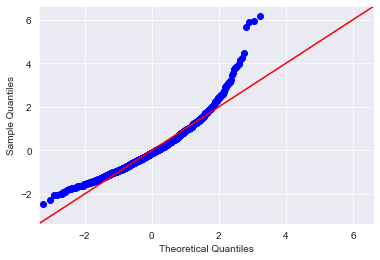

In [27]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Check Homoscedasticity Assumption
Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

2356
2356


ValueError: x and y must be the same size

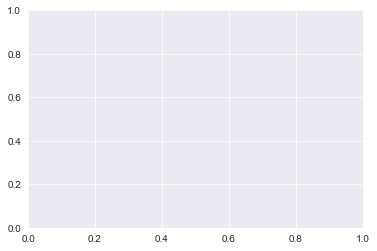

In [39]:
print(len(train[x_cols]))
print(len(train))
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

#### This is for the description data

### Make Additional Refinements
Check for outliers

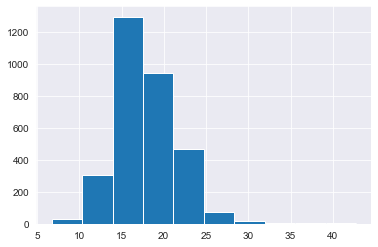

In [32]:
df.percent_Smokers.hist() # using smokers for example

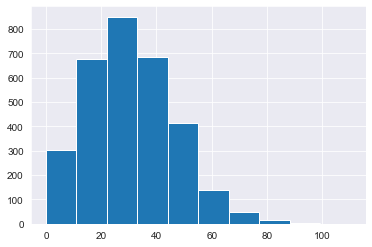

In [33]:
# Teen_Birth_Rate
df.Teen_Birth_Rate.hist()

In [34]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.Teen_Birth_Rate.quantile(q=q)))

0.8 percentile: 44.021632146200005
0.81 percentile: 44.57537042527999
0.82 percentile: 45.13786282708
0.83 percentile: 45.7437253245
0.84 percentile: 46.408010351360005
0.85 percentile: 47.19902860679999
0.86 percentile: 48.28781243336
0.87 percentile: 49.08266710231
0.88 percentile: 49.87582828444
0.89 percentile: 50.517701593030004
0.9 percentile: 51.372594874
0.91 percentile: 52.51232592673
0.92 percentile: 53.86830442256
0.93 percentile: 54.719212391510005
0.94 percentile: 56.57725777354
0.95 percentile: 58.71437884169999
0.96 percentile: 60.65668465383999
0.97 percentile: 63.949185825849995
0.98 percentile: 67.52576746547999
0.99 percentile: 73.87815089257002


### To remove extreme outliers we could use a function like this to remove outliers......

In [ ]:
# use code similar to this to strip outliers
# once it's gone it's gone => 

limit = 100

orig_tot = len(df)
df = df[df.Teen_Birth_Rate < limit] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.Teen_Birth_Rate.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

### Check the Homoscedasticity Assumption

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

### Get the measures into a single table 

In [ ]:
rf2.head(2)

In [ ]:
rf2 = rf2.dropna()

In [ ]:
rf2 = rf2[rf2.Measure != 'Measure']

In [ ]:
rf2

In [ ]:
### Create a column list

In [ ]:
indep = ['Premature death', 
         'Poor or fair health',
         'Poor physical health days', 
         'Poor mental health days', 
         'Low birthweight,Adult smoking',
         '**Adult obesity**', 
         'Food environment index', 
         'Physical inactivity', 
         'Access to exercise opportunities', 
         'Excessive drinking', 
         'Alcohol-impaired driving deaths', 
         'Sexually transmitted infections', 
         'Teen births',
         '**Uninsured**', 
         'Primary care physicians', 
         'Dentists', 
         'Mental health providers',
         'Preventable hospital stays', 
         'Mammography screening', 
         'Flu vaccinations', 
         '**High school graduation**', 
         '**Some college**', 
         '**Unemployment**', 
         'Children in poverty', 
         '**Income inequality**',
         'Children in single-parent households', 
         'Social associations', 
         'Violent crime', 
         'Injury deaths', 
         'Air pollution - particulate matter', 
         'Drinking water violations', 
         'Severe housing problems', 
         'Driving alone to work', 
         'Long commute - driving alone', 
         'Life expectancy', 
         'Premature age-adjusted mortality', 
         'Child mortality', 
         'Infant mortality', 
         'Frequent physical distress', 
         'Frequent mental distress', 
         'Diabetes prevalence', 
         'HIV prevalence', 
         'Food insecurity', 
         'Limited access to healthy foods', 
         'Drug overdose deaths', 
         'Motor vehicle crash deaths', 
         'Insufficient sleep', 
         'Uninsured adults', 
         'Uninsured children', 
         'Other primary care providers', 
         'Disconnected youth', 
         '**Median household income**', 
         'Children eligible for free or reduced price lunch', 
         '**Residential segregation - black/white**', 
         '**Residential segregation - non-white/white**', 
         'Homicides', 
         'Firearm fatalities',
         '**Homeownership**', 
         'Severe housing cost burden', 
         '**Demographics**']

In [ ]:
x_cols